<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Supervised Learning - Lineare Regression - Medical Insurance
</b></font> </br></p>

---


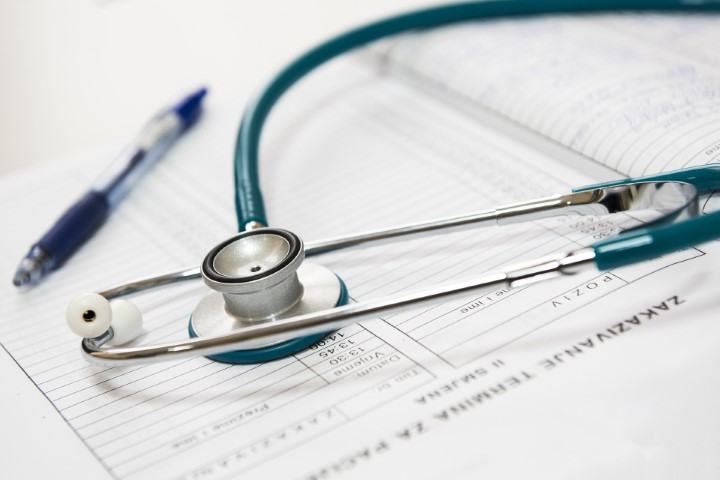

Image by <a href="https://pixabay.com/users/darkostojanovic-638422/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=563427">Darko Stojanovic</a> from <a href="https://pixabay.com//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=563427">Pixabay</a>

# **1 <font color='orange'>|</font> Understand**
***


<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

---   

Der Datensatz enthält Informationen zu Kosten für Krankenversicherungen in Abhängigkeit gesundheitlichen Merkmalen.


[DataSet](https://www.kaggle.com/datasets/mirichoi0218/insurance)

[Info](https://www.kaggle.com/datasets/mirichoi0218/insurance)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Insurance.csv", header=0)

In [ ]:
label ='charges'
features = [n for n in df.columns if n != label]

In [ ]:
target = df[label].copy()
data = df[features].copy()

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [ ]:
data.info()

In [ ]:
data.describe().T

In [ ]:
data.describe(include=object).T

In [ ]:
data.corr()

In [ ]:
target.value_counts()

# **2 <font color='orange'>|</font>  Prepare**

---

<p><font color='black' size="5">
Datentyp ermitteln
</font></p>

In [ ]:
all_col = data.columns
num_col = data.select_dtypes(include='number').columns
cat_col = data.select_dtypes(exclude='number').columns

<p><font color='black' size="5">
Codierung
</font></p>

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
data[cat_col] = OrdinalEncoder().fit_transform(data[cat_col])

<p><font color='black' size="5">
Skalierung
</font></p>

In [ ]:
from sklearn.preprocessing import StandardScaler
data[num_col] = StandardScaler().fit_transform(data[num_col])

<p><font color='black' size="5">
Missing Values
</font></p>

In [ ]:
data.isnull().sum()

# **3 <font color='orange'>|</font>  Modeling**
---

<p><font color='black' size="5">
Train-Test-Set
</font></p>


In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, shuffle=True, random_state=42)
data_train.shape, data_test.shape, target_train.shape, target_test.shape

 <p><font color='black' size="5">
Modellauswahl & Training
</font></p>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_features=4, max_depth=3, min_samples_leaf=40)
model.fit(data_train, target_train)

# **4 <font color='orange'>|</font> Evaluate**
---


<p><font color='black' size="5">
Prognose
</font></p>

In [ ]:
target_train_pred = model.predict(data_train)
target_test_pred = model.predict(data_test)


<p><font color='black' size="5">
Bestimmtheitsmass
</font></p>


In [ ]:
from sklearn.metrics import r2_score
r2_train = r2_score(target_train, target_train_pred)
print(f'Modell: {model} -- Train --- Bestimmtheitsmass: {r2_train:5.2f}' )

In [ ]:
r2_test = r2_score(target_test, target_test_pred)
print(f'Modell: {model} -- Test --- Bestimmtheitsmass: {r2_test:5.2f}' )

<p><font color='black' size="5">
Feature Importance
</font></p>

In [ ]:
import plotly.express as px
px.bar(x=model.feature_importances_, y=data.columns).update_yaxes(categoryorder="total ascending")

<p><font color='black' size="5">
Real vs Predict
</font></p>

In [ ]:
target_test_pred = pd.DataFrame(target_test_pred, columns=['predict'])
target_test = pd.DataFrame(target_test.values, columns=['test'])
pd.options.display.float_format = '{:,.0f}'.format
results = pd.concat([target_test, target_test_pred], axis=1)
results['Abw%'] = (results['test'] - results['predict']) / results['test'] *100
results.head(10).style.format("{:,.1f}")
results

# **5 <font color='orange'>|</font> Deploy**
---

# **A <font color='orange'>|</font> Analyse Streubereich real vs predict**    
---

Signifikante Unterschiede in der Streuung der prognostizierten und realen Daten können auf mehrere Faktoren zurückzuführen sein:

**Modellfehler:** Das Vorhandensein von Modellfehlern kann zu Unterschieden zwischen den prognostizierten und realen Daten führen. Ein lineares Regressionsmodell kann die Komplexität des zugrunde liegenden Zusammenhangs zwischen den Variablen möglicherweise nicht vollständig erfassen. Wenn das Modell unzureichend ist oder wichtige Faktoren nicht berücksichtigt, kann dies zu Abweichungen zwischen den prognostizierten und tatsächlichen Werten führen.

**Messfehler:** Messfehler in den Daten können zu Unterschieden in der Streuung führen. Wenn die gemessenen Werte mit Fehlern behaftet sind, kann dies zu einer erhöhten Streuung in den realen Daten im Vergleich zu den prognostizierten Werten führen. Messfehler können beispielsweise durch ungenaue Messinstrumente, menschliche Fehler oder Datenverlust während der Datenerfassung auftreten.

**Ausreißer:** Das Vorhandensein von Ausreißern in den realen Daten kann zu einer erhöhten Streuung führen. Ausreißer sind Beobachtungen, die stark von den übrigen Daten abweichen. Wenn Ausreißer in den realen Daten vorhanden sind, können sie die Streuung erhöhen und zu einer Diskrepanz zwischen den prognostizierten und tatsächlichen Werten führen.

**Zufällige Variation:** In den realen Daten kann es zufällige Variation geben, die zu einer erhöhten Streuung führt. Zufällige Variation kann durch natürliche Schwankungen, unvorhersehbare Ereignisse oder andere nicht modellierbare Faktoren verursacht werden. Diese zufällige Variation kann dazu führen, dass die prognostizierten und realen Werte in ihrem Streuungsverhalten voneinander abweichen.

Es ist wichtig zu beachten, dass die Prognosegenauigkeit von verschiedenen Faktoren beeinflusst wird und dass Unterschiede in der Streuung zwischen prognostizierten und realen Daten normal sein können. Eine gründliche Analyse der Daten, einschließlich einer Überprüfung des Modells und der Datenqualität, kann helfen, die Gründe für die Unterschiede in der Streuung zu identifizieren und zu bewerten.

<p><font color='black' size="5">
Aufbereitung der Daten
</font></p>

In [ ]:
data_new = data_test.copy()
data_new.reset_index(inplace=True)
data_new['real'] = results['test']
data_new['predict'] = results['predict']
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_test)
data_pca_df = pd.DataFrame(data_pca)
data_new['PCA1'] = data_pca_df[0]
data_new['PCA2'] = data_pca_df[1]

<p><font color='black' size="5">
Visualisierung real vs predict
</font></p>

In [ ]:
import plotly.express as px

In [ ]:
# Boxplot
title_ = 'Boxplot real vs predict'
px.box(data_new[['real', 'predict']], title=title_, width=600, height=600)

In [ ]:
title_ = 'Boxplot Target train'
px.box(target_train, title=title_, width=600, height=600)

<p><font color='black' size="5">
Anzahl der Ausreißer bestimmen
</font></p>

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=5) # Ausreisser, wenn er sich stark von seinen Nachbarn unterscheidet
outliers = lof.fit_predict(pd.DataFrame(target))
num_outliers = len(outliers[outliers == -1])
print("Anzahl der Ausreißer:", num_outliers)

**Festlegung n:**

Es ist wichtig, den Wert von "n_neighbors" entsprechend dem Kontext und den Eigenschaften deiner Daten anzupassen. Hier sind einige Überlegungen, die dir bei der Auswahl helfen können:

Größe des Datensatzes: Bei großen Datensätzen mit vielen Datenpunkten kann es sinnvoll sein, einen größeren Wert für "n_neighbors" zu wählen, um eine stabilere Schätzung der Ausreißerfaktoren zu erhalten. Ein typischer Anfangswert könnte beispielsweise zwischen 20 und 50 liegen.

Datenverteilung: Die Verteilung der Daten kann ebenfalls einen Einfluss haben. Bei stark lokalisierten Daten oder Clustern könnte ein niedrigerer Wert für "n_neighbors" angemessen sein, um lokale Ausreißer besser zu erkennen. Bei gleichmäßig verteilten Daten könnte ein höherer Wert für "n_neighbors" geeignet sein, um eine zuverlässige Schätzung des Hintergrunds zu ermöglichen.

Erfahrungswerte und Anwendungskenntnisse: Erfahrung mit den Daten oder Kenntnisse über den Anwendungsbereich können wertvolle Hinweise geben. Wenn du bereits Informationen über typische Ausreißer in deinem Datenbereich hast, kannst du den Wert von "n_neighbors" entsprechend anpassen, um diese Ausreißer besser zu erfassen.

Experimentieren und Validieren: Es ist ratsam, verschiedene Werte für "n_neighbors" auszuprobieren und die Ergebnisse zu überprüfen. Man kann verschiedene Werte testen und die Leistung des LOF-Algorithmus anhand von Metriken wie Genauigkeit, Recall oder F1-Score bewerten. Zudem kann man visuelle Inspektionen der Ausreißerergebnisse durchführen, um festzustellen, ob die Erwartungen erfüllen.

In [ ]:
title_ = 'Streupunktdiagramm real vs predict'
px.scatter(data_new, x='real', y='predict', title=title_, width=1200, height=600)

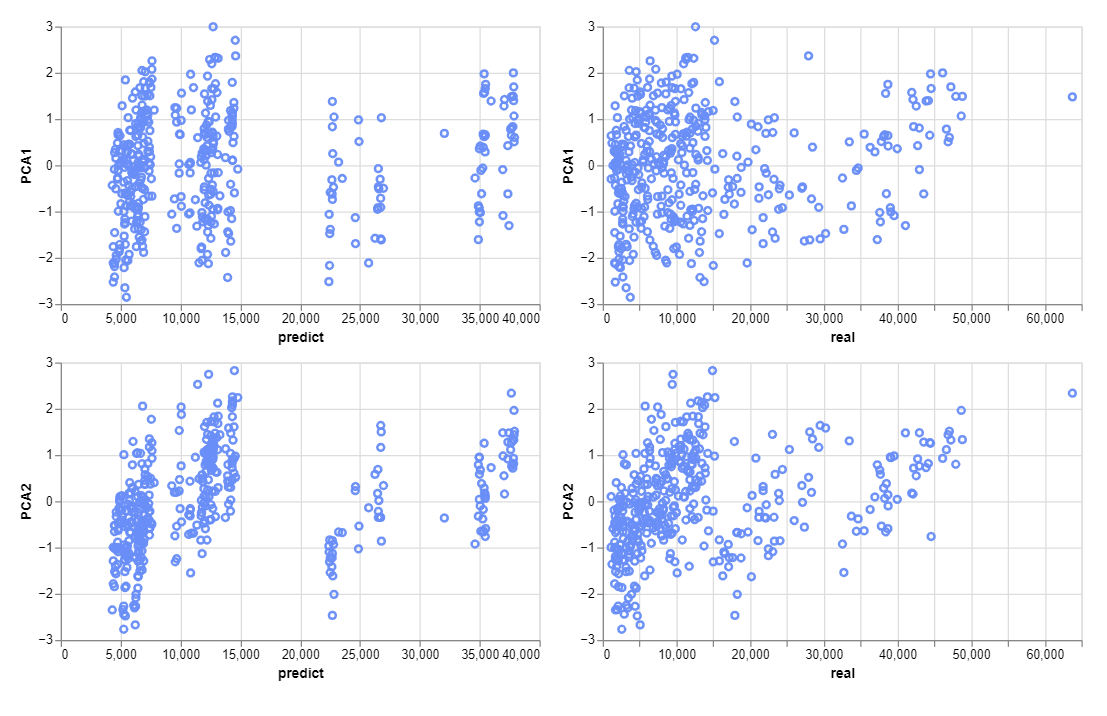

# **B <font color='orange'>|</font> Analyse Verteilung real vs predict**    
---

Wenn es eine signifikante unterschiedliche Verteilung der prognostizierten und realen Daten gibt und die Prognose-Methode ein Random Forest ist, können folgende Gründe dafür verantwortlich sein:

**Nichtlineare Beziehungen:** Random Forests können nichtlineare Beziehungen zwischen den Variablen modellieren. Wenn die Beziehung zwischen den unabhängigen und abhängigen Variablen nicht linear ist, kann dies zu einer unterschiedlichen Verteilung der prognostizierten und realen Daten führen. Der Random Forest kann möglicherweise die nichtlinearen Muster besser erfassen, was zu einer anderen Verteilung der prognostizierten Werte im Vergleich zu den realen Werten führt.

**Interaktionseffekte:** Random Forests können Interaktionseffekte zwischen den Variablen berücksichtigen. Wenn es in den Daten Interaktionen zwischen den unabhängigen Variablen gibt, die einen Einfluss auf die abhängige Variable haben, kann dies zu Unterschieden in der Verteilung der prognostizierten und realen Daten führen. Der Random Forest kann diese Interaktionseffekte erfassen und zu einer anderen Verteilung der prognostizierten Werte führen.

**Overfitting:** Random Forests haben die Fähigkeit, sich an die Trainingsdaten anzupassen und komplexe Modelle zu erstellen. Wenn der Random Forest jedoch zu stark an die Trainingsdaten angepasst ist, besteht die Gefahr von Overfitting. Overfitting tritt auf, wenn das Modell die zufälligen Variationen und Ausreißer in den Trainingsdaten zu stark berücksichtigt und dadurch eine schlechte Generalisierung auf neue Daten erfolgt. In solchen Fällen kann die Verteilung der prognostizierten Daten von der Verteilung der realen Daten abweichen.

**Datenungleichgewicht:** Wenn die Trainingsdaten ein Ungleichgewicht aufweisen, d.h. eine Klasse oder eine Kategorie in den Daten stark überrepräsentiert ist, kann dies zu einer unterschiedlichen Verteilung der prognostizierten und realen Daten führen. Der Random Forest kann dazu neigen, die häufigere Klasse oder Kategorie besser zu prognostizieren und somit zu einer Verzerrung der Verteilung der prognostizierten Werte führen.


In [ ]:
title_ = 'Histogramm real vs predict'
fig = px.histogram(data_new, x=['real', 'predict'], nbins=15, title=title_)
fig.update_layout(barmode='group', bargap=0.1)
fig.show()

In [ ]:
title_ = 'Histogramm target train'
fig = px.histogram(target_train, nbins=15, title=title_)
fig.update_layout(barmode='group', bargap=0.1)
fig.show()

**Possible next step: Analyse Interaktionseffekte**

Interaktionseffekte in einem statistischen Modell, einschließlich eines Random Forests, können auf verschiedene Weisen identifiziert werden. Hier sind einige Ansätze:

**Grafische Darstellung:** Eine Möglichkeit, Interaktionseffekte zu identifizieren, besteht darin, die Daten grafisch darzustellen. Dies kann durch Scatterplots, Linienplots oder Heatmaps erfolgen. Wenn Interaktionseffekte vorhanden sind, können Sie beobachten, wie sich die Beziehung zwischen einer unabhängigen Variable und der abhängigen Variable in Abhängigkeit von einer anderen unabhängigen Variable ändert. Wenn sich die Linien oder Muster auf den Diagrammen kreuzen, überlappen oder auseinanderlaufen, kann dies auf eine Interaktion hindeuten.

**Statistische Tests:** Es gibt verschiedene statistische Tests, mit denen Interaktionseffekte in einem Modell geprüft werden können. Dazu gehören der F-Test für Interaktionen, der Chi-Quadrat-Test für Interaktionen und der Likelihood-Ratio-Test. Diese Tests können die Hypothese überprüfen, ob der Hinzufügen von Interaktionstermen zur Modellierung eine signifikante Verbesserung gegenüber dem Modell ohne Interaktionen bringt.

**Analyse von Residuen:** Die Analyse der Residuen kann ebenfalls Aufschluss über mögliche Interaktionseffekte geben. Die Residuen sind die Differenz zwischen den beobachteten Werten und den vorhergesagten Werten des Modells. Wenn Interaktionseffekte vorhanden sind, können in den Residuen Muster erkennbar sein, die auf unerklärte Variationen hinweisen, die auf Interaktionen zwischen den unabhängigen Variablen hindeuten.

**Durchführung von Teileffektanalysen:** Bei einer Teileffektanalyse wird eine unabhängige Variable fixiert, während andere unabhängige Variablen variieren. Durch die Betrachtung der Auswirkungen der unabhängigen Variablen in unterschiedlichen Kombinationen kann auf Interaktionseffekte geschlossen werden. Wenn sich die Auswirkungen einer Variablen in Abhängigkeit von der Ausprägung einer anderen Variablen ändern, deutet dies auf eine mögliche Interaktion hin.

Es ist wichtig zu beachten, dass die Identifizierung von Interaktionseffekten sowohl statistische als auch inhaltliche Überlegungen erfordert. Es kann nützlich sein, Domänenexperten einzubeziehen, um das Verständnis der Variablenbeziehungen zu verbessern und die Ergebnisse zu interpretieren.